In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [20]:
train = pd.read_csv('../../data/main_data/train/train.csv')
test = pd.read_csv('../../data/main_data/test/test.csv')

combined = pd.concat([train,test])
combined

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,red_card,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,3000000,Bayer 04 Leverkusen,Bundesliga,...,0.0,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,367916,AGF,Superligaen,...,0.0,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,4000000,FC Bayern München,Bundesliga,...,0.0,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,250000,Plymouth Argyle,Championship,...,0.0,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,1191864,Atalanta,Serie A,...,0.0,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,arbnor mucolli,1999-09-14,F,175.0,left,2022-05-21,400000.0,464648,Vejle,"Superliga, Relegation Round",...,0.0,6.973077,22.923077,1.500000,0.557692,0.000000,0.000000,0.000000,0.000000,0.000000
2338,victor nelsson,1998-10-13,D,187.0,right,2021-08-08,3500000.0,4292353,FC København,Superligaen,...,0.0,6.784127,51.158730,3.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2339,elves balde,1999-10-01,M,168.0,right,2024-10-06,500000.0,500000,SC Farense,Liga Portugal Betclic,...,0.0,6.627273,4.666667,0.515152,0.484848,0.000000,0.044841,0.077558,0.000000,0.000000
2340,stephen duke-mckenna,2000-08-16,M,170.0,right,2023-10-07,150000.0,158450,Queens Park Rangers,Championship,...,0.0,5.433333,4.000000,0.833333,0.166667,0.000000,0.003164,0.000000,0.000000,0.000000


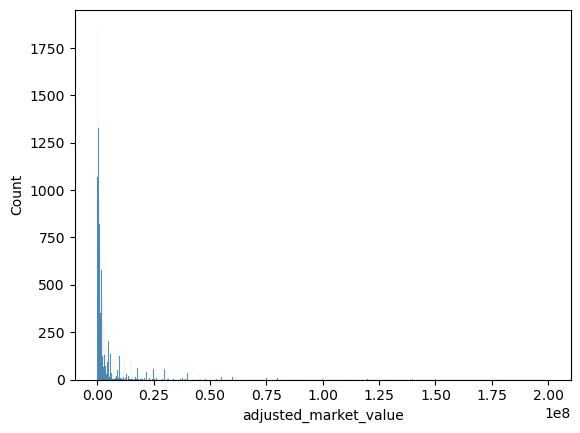

In [21]:
hist_comb = combined.copy()
sns.histplot(hist_comb,x='adjusted_market_value')
plt.show()

In [22]:
print(combined['adjusted_market_value'].kurt())
print(combined['adjusted_market_value'].skew())

84.07348374444683
7.248738885601478


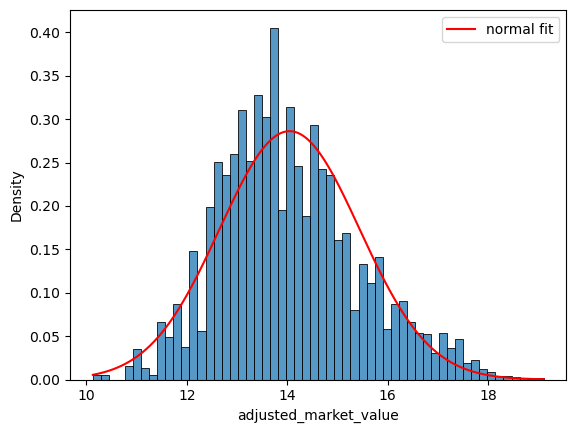

In [23]:
combined['adjusted_market_value'] = np.log1p(combined['adjusted_market_value'])
adjusted_target_col = combined['adjusted_market_value']
x=np.linspace(min(adjusted_target_col),max(adjusted_target_col),100000)
sns.histplot(data=combined,x='adjusted_market_value',stat='density')
mu,std = stats.norm.fit(adjusted_target_col)
plt.plot(x,stats.norm.pdf(x,mu,std),'r-',label='normal fit')
plt.legend()
combined['adjusted_market_value'] = np.expm1(combined['adjusted_market_value'])

In [24]:
# Looks look at the correlation matrix for the features on goalies
features = ['minutesPlayed', 'totalLongBalls','keyPass', 'totalPass','savedShotsFromInsideTheBox', 'saves',
                            'totalKeeperSweeper', 'goalsPrevented', 'touches','blockedScoringAttempt',
                            'yellow_card', 'red_card', 'rating', 'accuratePass',
                            'accurateLongBalls','accurateKeeperSweeper','age']
features_target = features + ['adjusted_market_value']

In [ ]:
import os
import sys
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))

sys.path.insert(0,parent_dir)
import models.main_dataset.ensamble_model as em
import importlib
importlib.reload(em)

<module 'models.original_dataset.ensamble_model' from '/home/cody/Documents/DataSciBC/EPLTransfer/models/original_dataset/ensamble_model.py'>

In [26]:
model = em.G_Pos(train,scale='log')
combined = model._transform_data(combined)

<Axes: title={'center': 'Pearson Correlation Matrix'}>

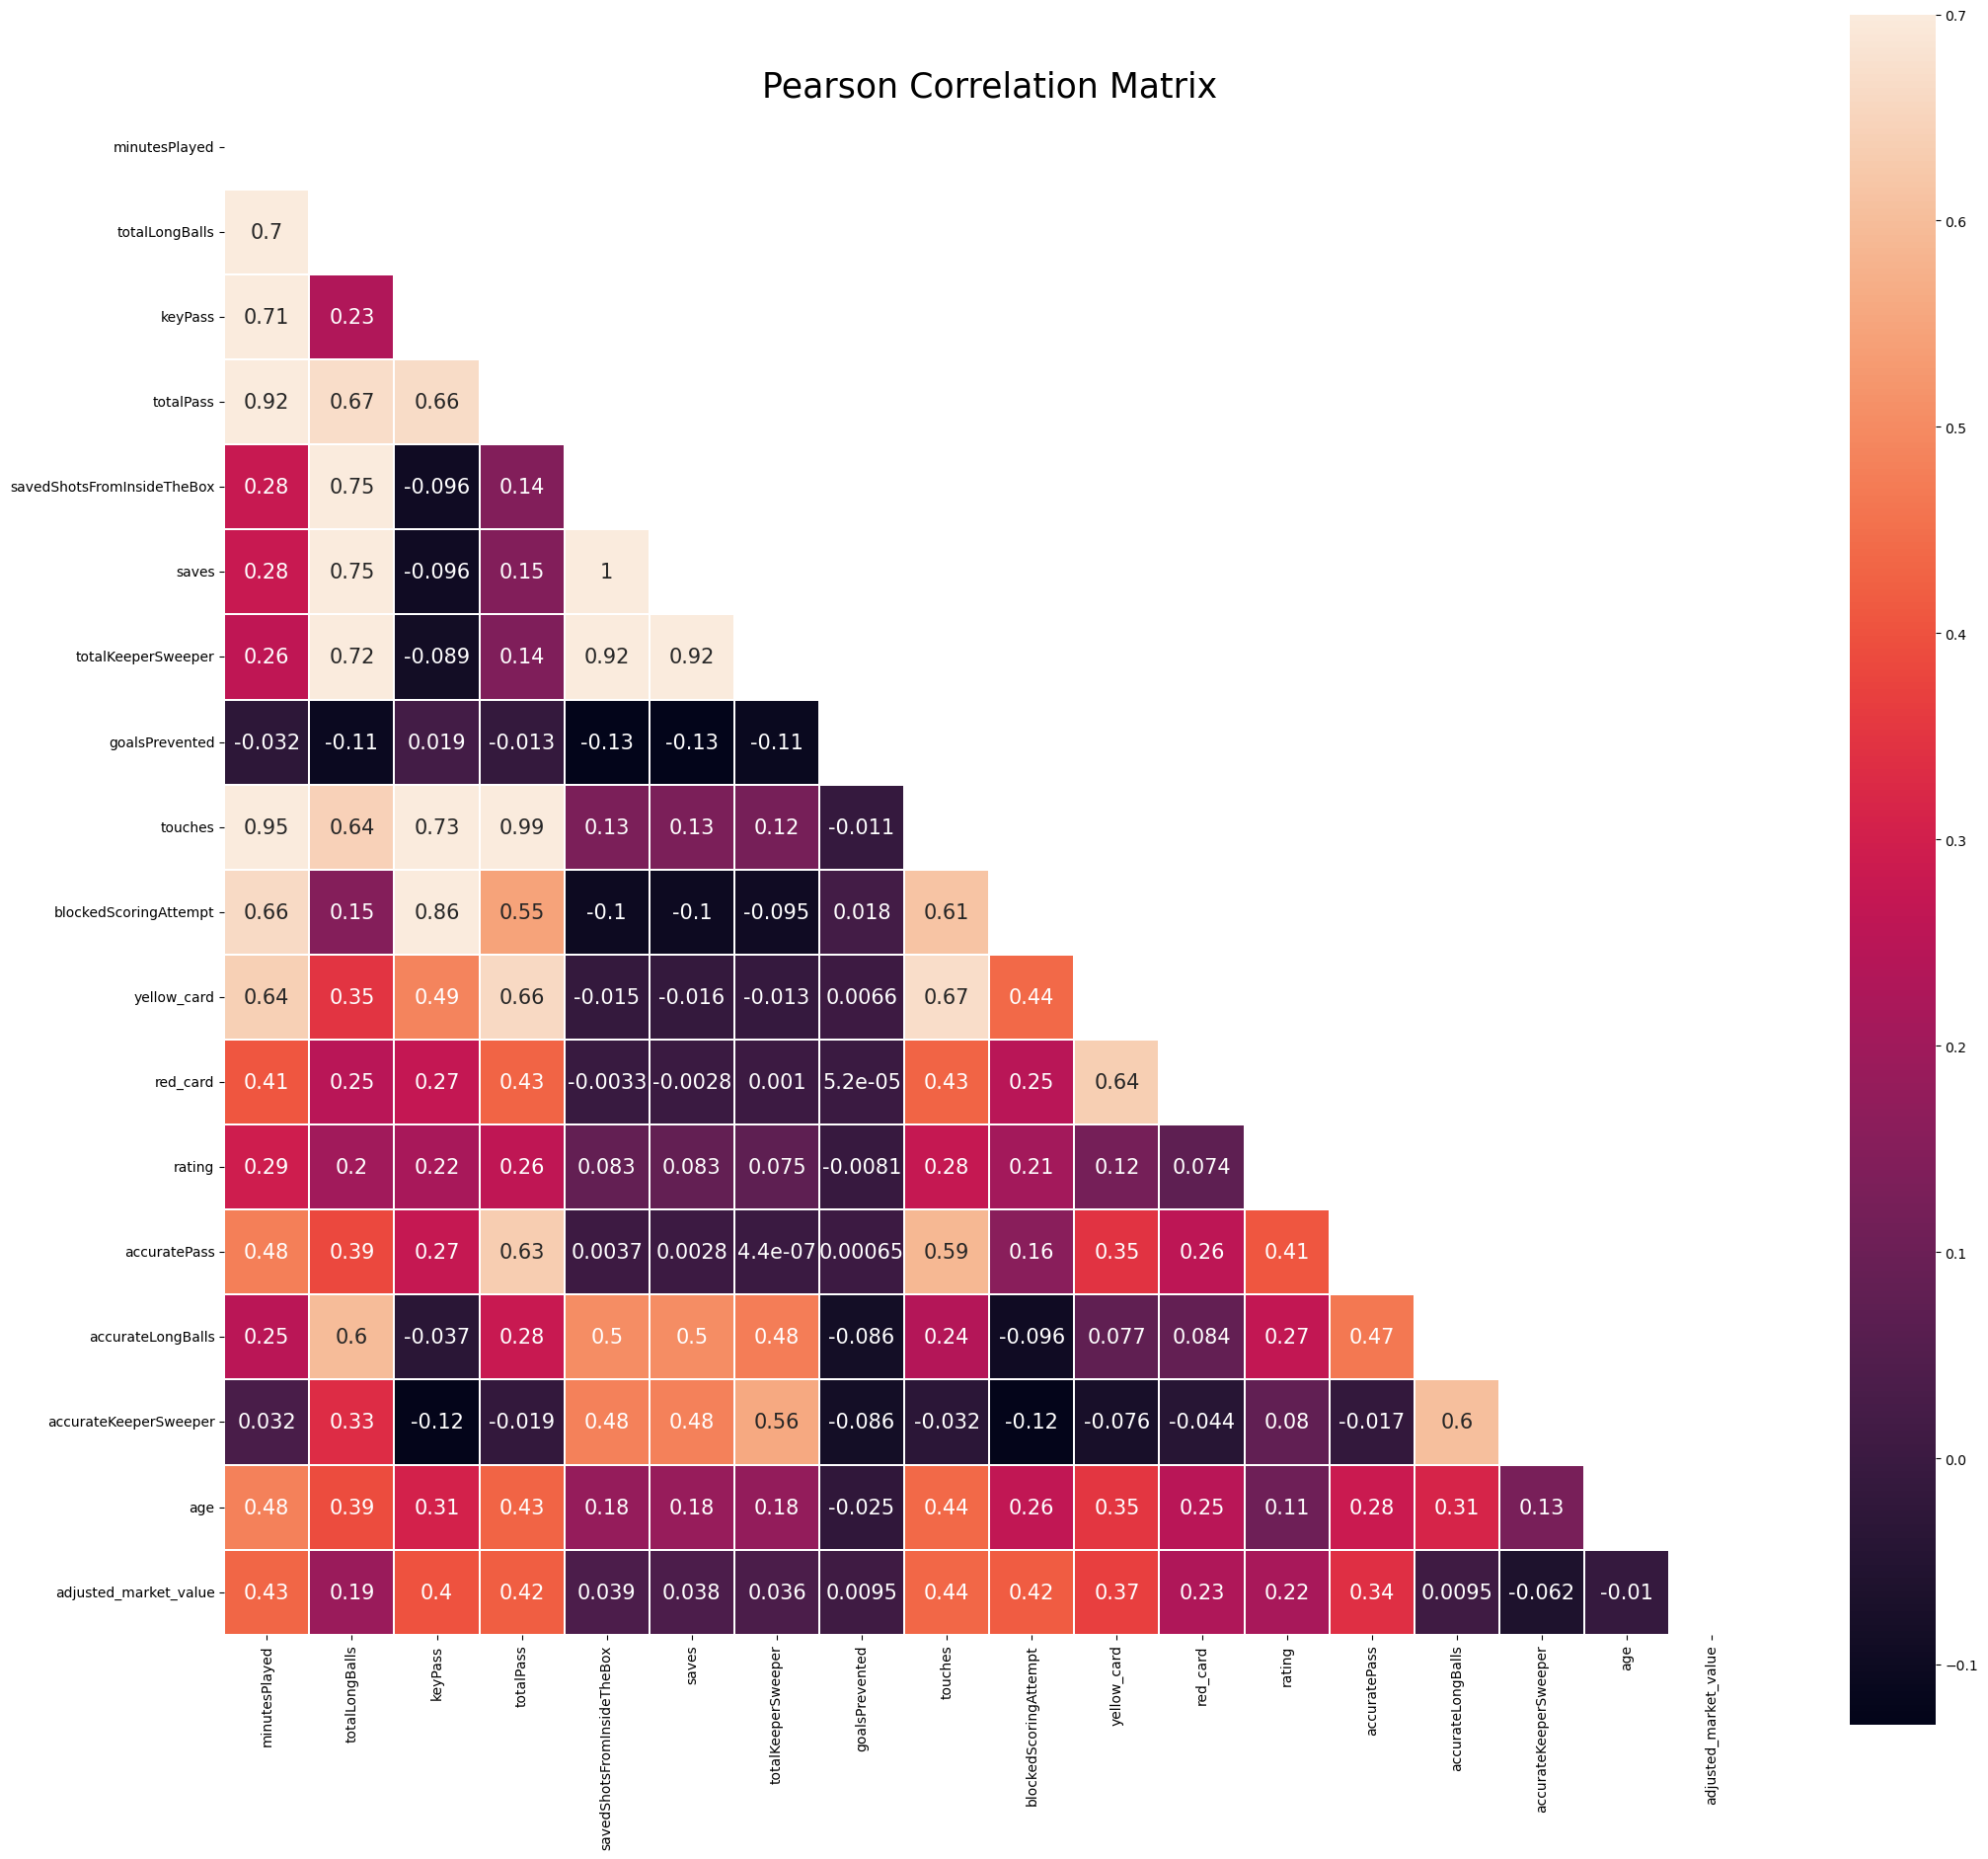

In [27]:

mask = np.zeros_like(combined[features_target].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(25,25))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(combined[features_target].corr(),linewidths=0.25,vmax=0.7,square=True,linecolor='w',annot=True,annot_kws={'size':15},
            mask=mask,cbar_kws={'shrink':.9})

In [28]:
# Lets adjust the features so there is less correlation.
features = ['minutesPlayed', 'saves',
                             'goalsPrevented', 'red_card', 'rating', 'accuratePass',
                            'accurateLongBalls','age']
features_target = features + ['adjusted_market_value']

<Axes: title={'center': 'Pearson Correlation Matrix'}>

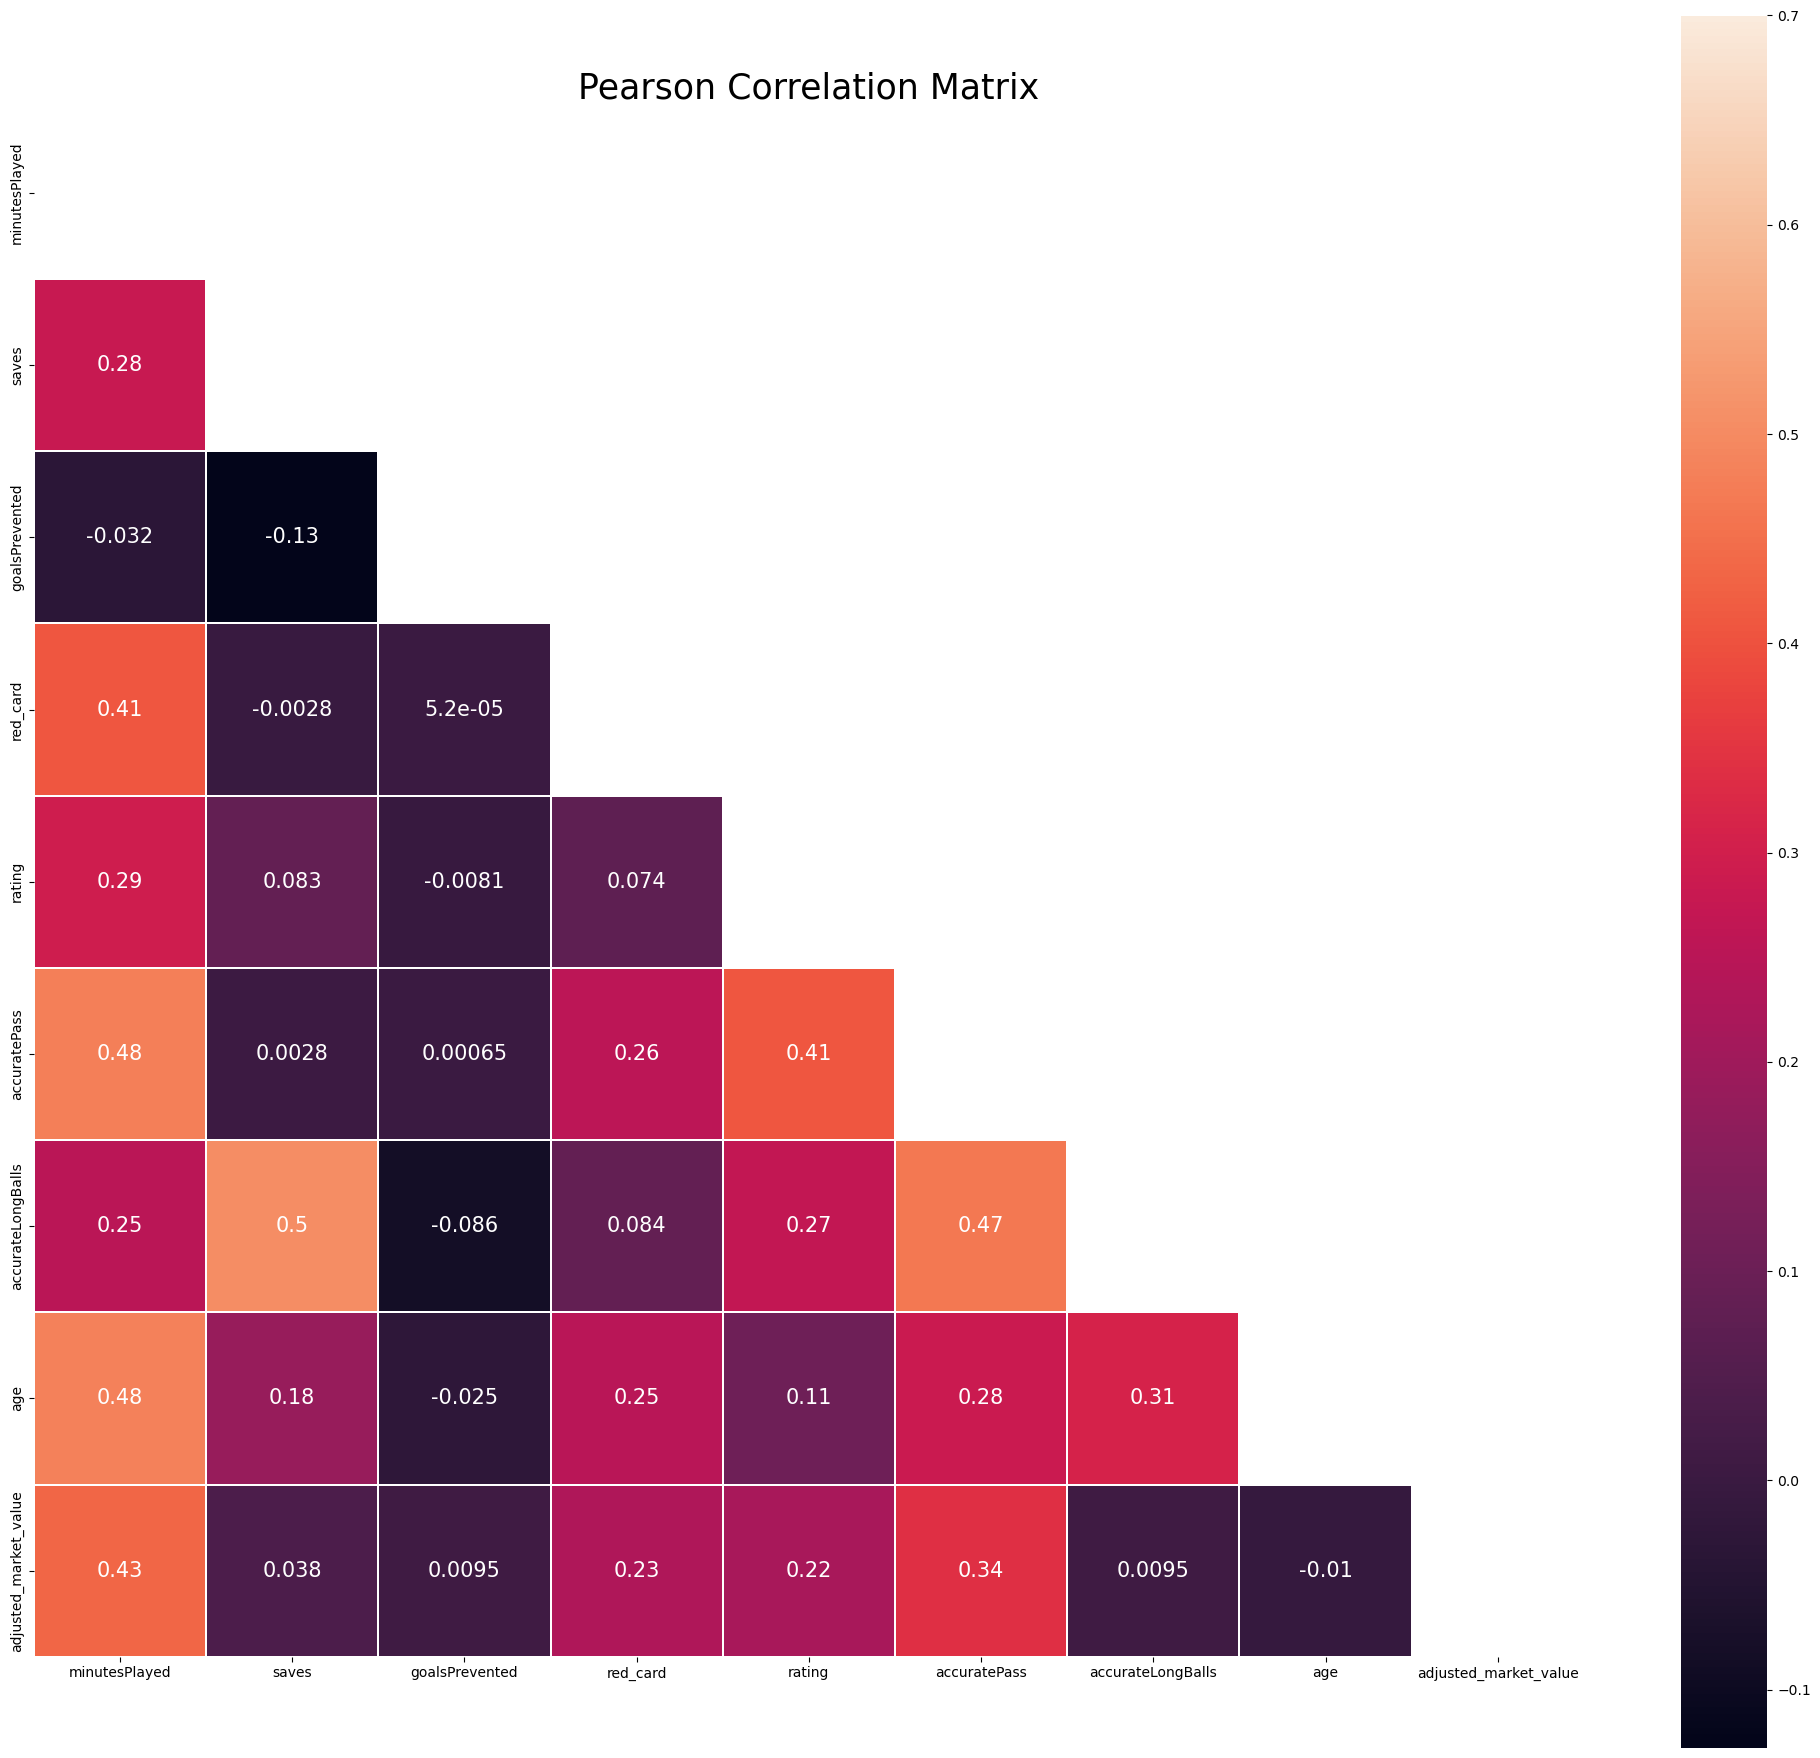

In [29]:
mask = np.zeros_like(combined[features_target].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(25,25))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(combined[features_target].corr(),linewidths=0.25,vmax=0.7,square=True,linecolor='w',annot=True,annot_kws={'size':15},
            mask=mask,cbar_kws={'shrink':.9})

In [36]:
stat_g = train.copy()
stat_g['adjusted_market_value'] = np.log1p(stat_g['adjusted_market_value'])

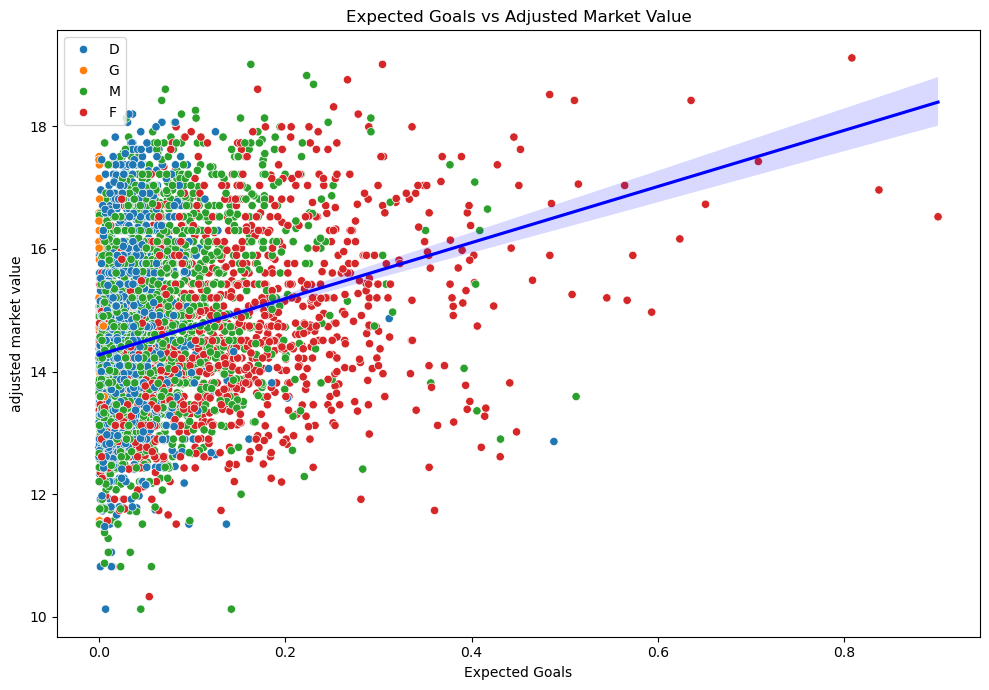

In [37]:
fig,axes =plt.subplots(figsize=(10,7))
stat_g_xg = stat_g[stat_g['expectedGoals']!=0]

gs = 'expectedGoals'

    
sns.scatterplot(data=stat_g_xg,x=gs,y='adjusted_market_value',hue='pos')
sns.regplot(data=stat_g_xg,x=gs,y='adjusted_market_value',scatter=False,color='blue')
plt.title(f'Expected Goals vs Adjusted Market Value')

plt.xlabel('Expected Goals')
plt.ylabel('adjusted market value')

plt.tight_layout()
plt.legend()
plt.show()

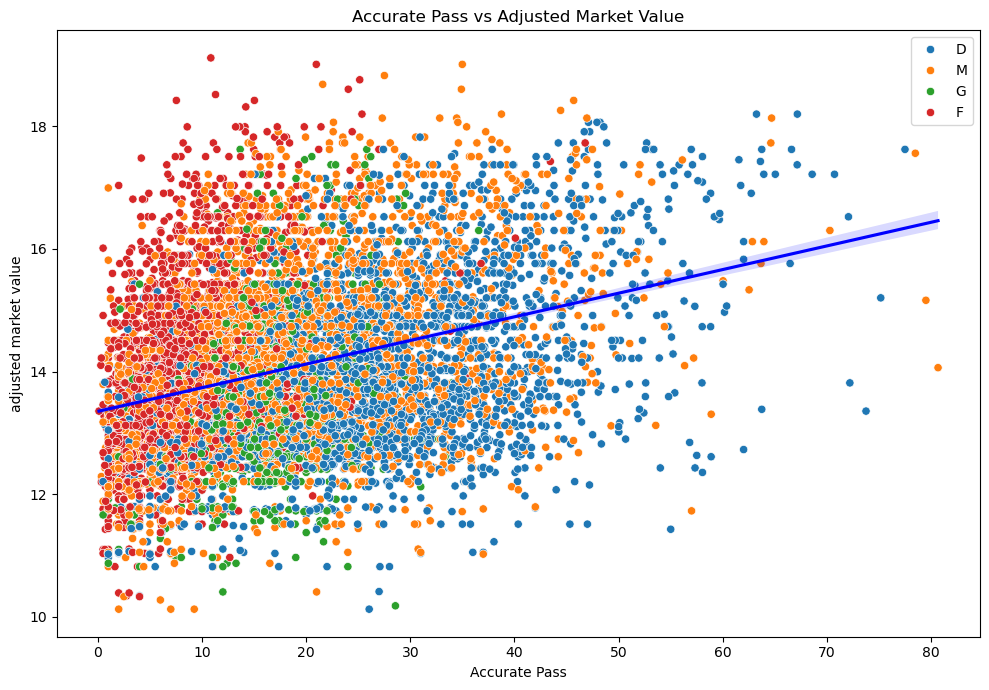

In [41]:
fig,axes =plt.subplots(figsize=(10,7))
stat_g_ap = stat_g[stat_g['accuratePass']!=0]

gs = 'accuratePass'

    
sns.scatterplot(data=stat_g_ap,x=gs,y='adjusted_market_value',hue='pos')
sns.regplot(data=stat_g_ap,x=gs,y='adjusted_market_value',scatter=False,color='blue')
plt.title(f'Accurate Pass vs Adjusted Market Value')

plt.xlabel('Accurate Pass')
plt.ylabel('adjusted market value')

plt.tight_layout()
plt.legend()
plt.show()

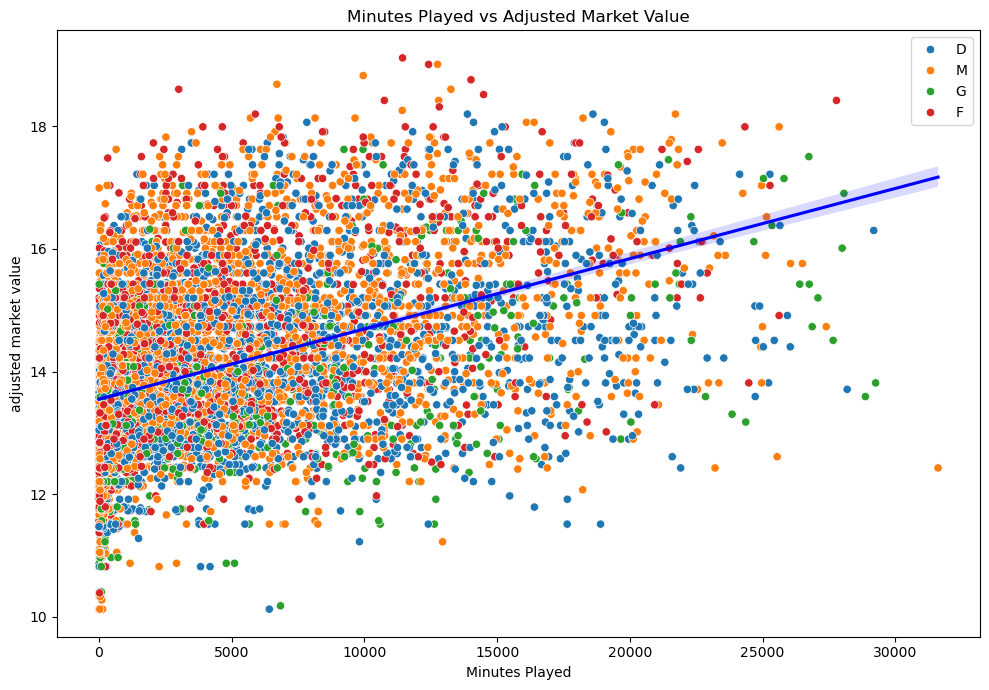

In [44]:
fig,axes =plt.subplots(figsize=(10,7))
stat_g_g = stat_g[stat_g['minutesPlayed']!=0]

gs = 'minutesPlayed'

    
sns.scatterplot(data=stat_g_ap,x=gs,y='adjusted_market_value',hue='pos')
sns.regplot(data=stat_g_ap,x=gs,y='adjusted_market_value',scatter=False,color='blue')
plt.title(f'Minutes Played vs Adjusted Market Value')

plt.xlabel('Minutes Played')
plt.ylabel('adjusted market value')

plt.tight_layout()
plt.legend()
plt.show()

/tmp/ipykernel_192621/1076545564.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[3].legend().remove()
/tmp/ipykernel_192621/1076545564.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


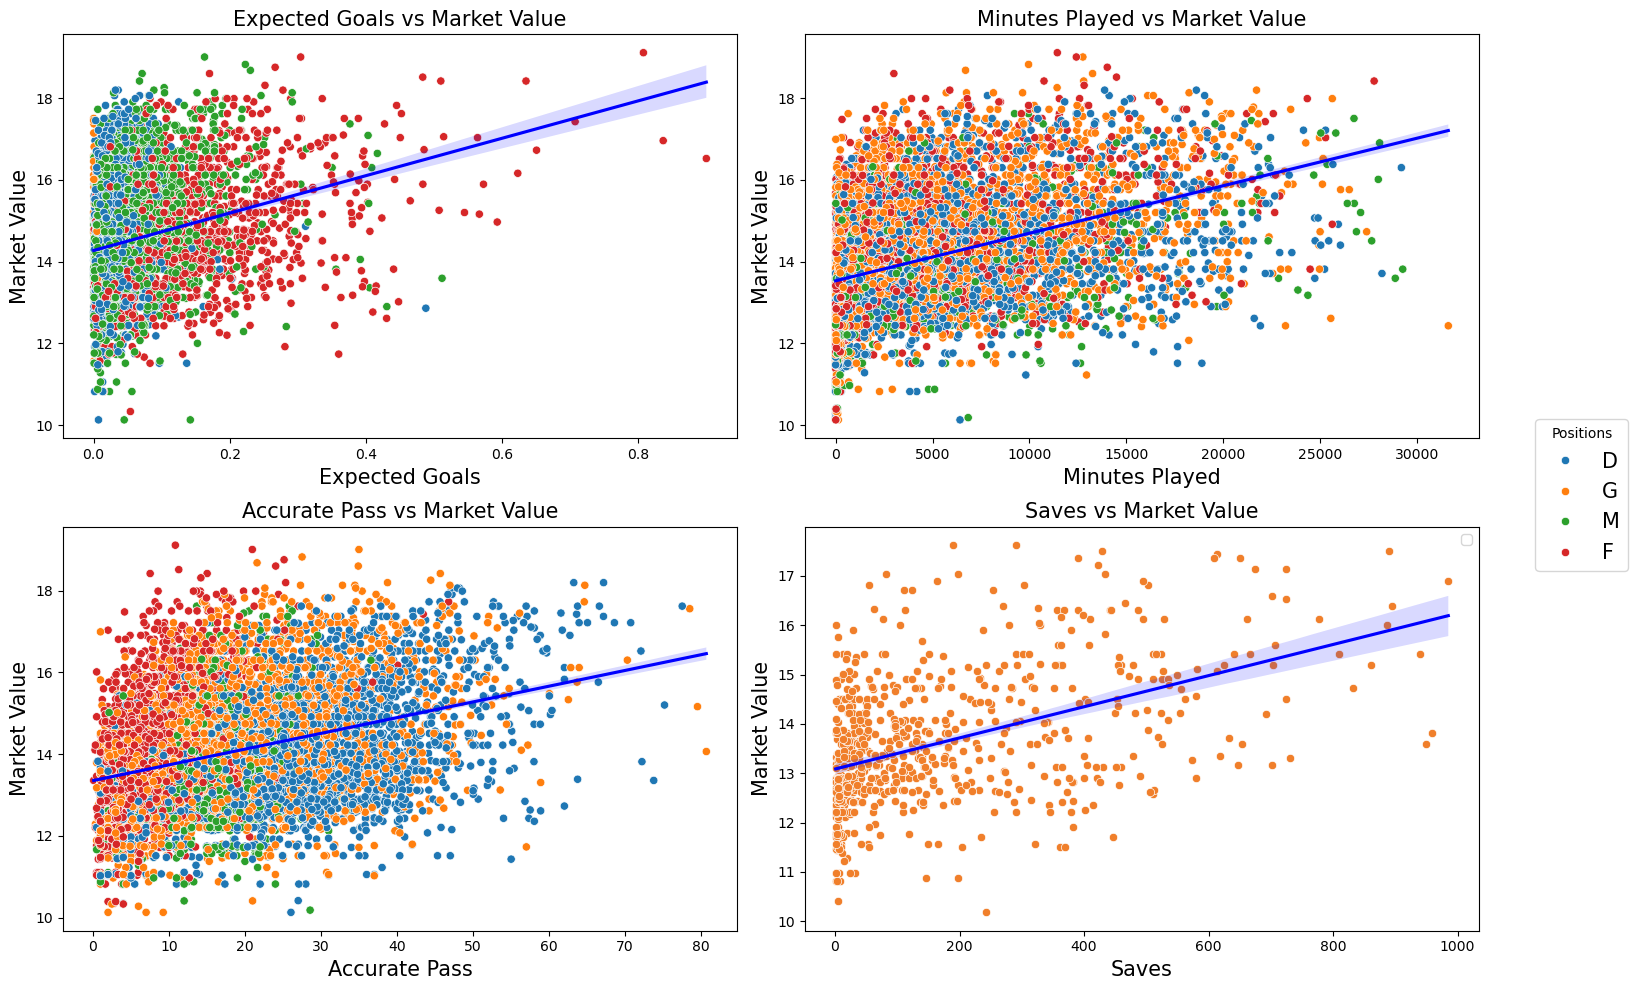

In [75]:
g_stats = train.copy()
gs = ['expectedGoals','minutesPlayed','accuratePass','saves']
g_stats['adjusted_market_value'] = np.log1p(g_stats['adjusted_market_value'])



fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(15,10))
fontsize=15
axes = axes.flatten()

g_stats_xg = g_stats[g_stats[gs[0]] !=0]
sns.scatterplot(data=g_stats_xg,x=gs[0],y='adjusted_market_value',hue='pos',ax=axes[0])
sns.regplot(data=g_stats_xg,x=gs[0],y='adjusted_market_value',scatter=False,ax=axes[0],color='blue')
axes[0].set_title(f'Expected Goals vs Market Value',fontsize=fontsize)
axes[0].legend().remove()

axes[0].set_xlabel('Expected Goals',fontsize=fontsize)
axes[0].set_ylabel('Market Value',fontsize=fontsize)

g_stats_mp = g_stats[g_stats[gs[1]] !=0]
sns.scatterplot(data=g_stats_mp,x=gs[1],y='adjusted_market_value',hue='pos',ax=axes[1])
sns.regplot(data=g_stats_mp,x=gs[1],y='adjusted_market_value',scatter=False,ax=axes[1],color='blue')
axes[1].set_title(f'Minutes Played vs Market Value',fontsize=fontsize)
axes[1].legend().remove()
axes[1].set_xlabel('Minutes Played',fontsize=fontsize)
axes[1].set_ylabel('Market Value',fontsize=fontsize)

g_stats_ap = g_stats[g_stats[gs[2]] !=0]
sns.scatterplot(data=g_stats_ap,x=gs[2],y='adjusted_market_value',hue='pos',ax=axes[2])
sns.regplot(data=g_stats_ap,x=gs[2],y='adjusted_market_value',scatter=False,ax=axes[2],color='blue')
axes[2].set_title(f'Accurate Pass vs Market Value',fontsize=fontsize)
axes[2].legend().remove()
axes[2].set_xlabel('Accurate Pass',fontsize=fontsize)
axes[2].set_ylabel('Market Value',fontsize=fontsize)

g_stats_s = g_stats[g_stats[gs[3]] !=0]
sns.scatterplot(data=g_stats_s,x=gs[3],y='adjusted_market_value',ax=axes[3],color='#F07F2B')
sns.regplot(data=g_stats_s,x=gs[3],y='adjusted_market_value',scatter=False,ax=axes[3],color='blue')
axes[3].set_title(f'Saves vs Market Value',fontsize=fontsize)
axes[3].legend().remove()
axes[3].set_xlabel('Saves',fontsize=fontsize)
axes[3].set_ylabel('Market Value',fontsize=fontsize)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), title='Positions',fontsize=fontsize)
plt.tight_layout()
plt.legend()
plt.show()

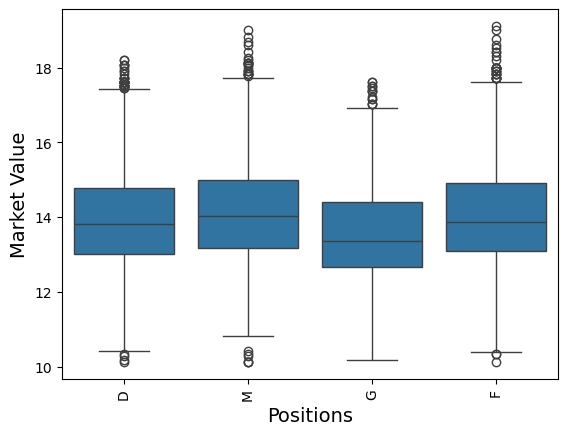

In [78]:

#df=scaled
plt.figure(1)

sns.boxplot(x=g_stats['pos'],y=g_stats['adjusted_market_value'])
plt.xlabel('Positions',fontsize=14)
plt.ylabel('Market Value',fontsize=14)
plt.xticks(rotation=90)




plt.show()